In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import data_pre_proces
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [18]:
data_black_fraiday = pd.read_csv("BlackFriday.csv", header=None,sep=',')
data_black_fraiday.columns = [i for i in  data_black_fraiday.loc[[0]].values[0]]
data_black_fraiday = data_black_fraiday.drop([0])
data_black_fraiday.index = range(data_black_fraiday.shape[0])
data_reserv_data_black_fraiday = copy.deepcopy(data_black_fraiday)
# Print the original version of data
print(data_black_fraiday)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        User_ID Product_ID Gender    Age Occupation City_Category  \
0       1000001  P00069042      F   0-17         10             A   
1       1000001  P00248942      F   0-17         10             A   
2       1000001  P00087842      F   0-17         10             A   
3       1000001  P00085442      F   0-17         10             A   
4       1000002  P00285442      M    55+         16             C   
5       1000003  P00193542      M  26-35         15             A   
6       1000004  P00184942      M  46-50          7             B   
7       1000004  P00346142      M  46-50          7             B   
8       1000004   P0097242      M  46-50          7             B   
9       1000005  P00274942      M  26-35         20             A   
10      1000005  P00251242      M  26-35         20             A   
11      1000005  P00014542      M  26-35         20             A   
12      1000005  P00031342      M  26-35         20             A   
13      1000005  P00145042      M 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4           7              2   
8       1000004       97242       1   4           7              2   
9       1000005      274942       1   2          20              0   
10      1000005      251242       1   2          20              0   
11      1000005       14542       1   2          20              0   
12      1000005       31342       1   2          20              0   
13      1000005     

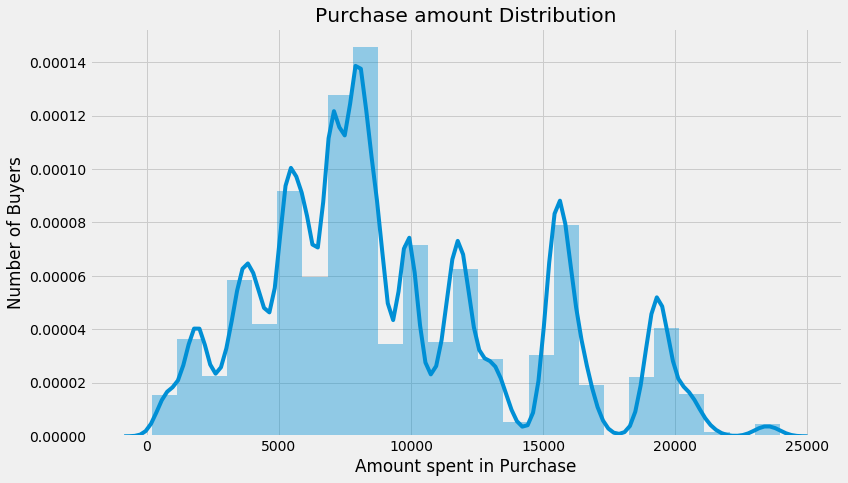

In [19]:
dct_for_age = {'0-17': 0, '18-25': 1 ,'26-35': 2, '36-45' : 3, '46-50' : 4, '51-55' : 5, '55+' : 6}
#Modification of data and numeric imputation
def modification_of_data(data,name_of_col,dct):
    for i in dct.keys():
        data.loc[data[name_of_col] == i, name_of_col] = dct[i]
    return data

data = data_pre_proces.elements_col_to_int(data_black_fraiday,'Gender')
data = modification_of_data(data,'Age',dct_for_age)
data.loc[data['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = '4'
data.Gender = pd.to_numeric(data.Gender)
data.Occupation = pd.to_numeric(data.Occupation)
data = data_pre_proces.elements_col_to_int(data_black_fraiday,'City_Category')
data.Purchase = pd.to_numeric(data.Purchase)
data.Stay_In_Current_City_Years = pd.to_numeric(data.Stay_In_Current_City_Years)
data.Marital_Status = pd.to_numeric(data.Marital_Status)
data.Product_Category_1 = pd.to_numeric(data.Product_Category_1)
data.Product_Category_2 = pd.to_numeric(data.Product_Category_2)
data.Product_Category_3 = pd.to_numeric(data.Product_Category_3)
data['Product_ID'] = data['Product_ID'].str.replace('P00', '')
data.Product_ID = pd.to_numeric(data.Product_ID)
# show the distribution of the price ---> it looks like normal distribution per Number of Buyers 
def plot_show(data,col_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,7))
    sns.distplot(data[col_name], bins = 25)
    plt.xlabel("Amount spent in Purchase")
    plt.ylabel("Number of Buyers")
    plt.title("Purchase amount Distribution")
plot_show(data_black_fraiday,'Purchase')    
print(data)

In [20]:
numeric_features = data.select_dtypes(include=[np.number])
#select numeric features for corelation analis
print(numeric_features.dtypes)
print(data)

Product_ID                      int64
Gender                          int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object
        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4       

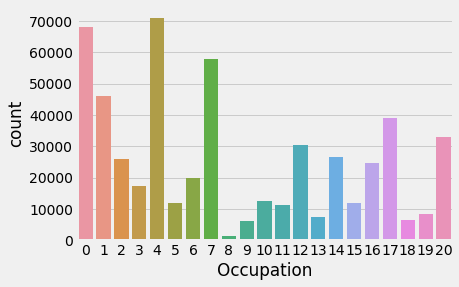

In [21]:
sns.countplot(data.Occupation)
#Here I became to make better understanding of data

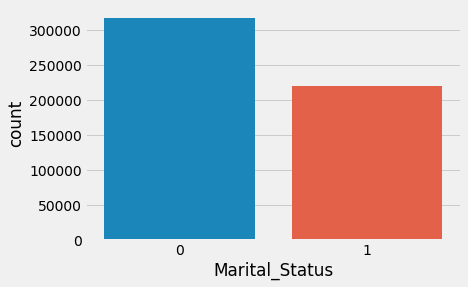

In [22]:
sns.countplot(data.Marital_Status)

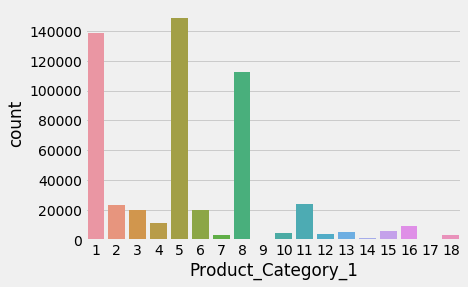

In [23]:
sns.countplot(data.Product_Category_1)
# For example here you will see corilation between  Product_Category_1 , 2, 3(only a few people bought several types of goods)

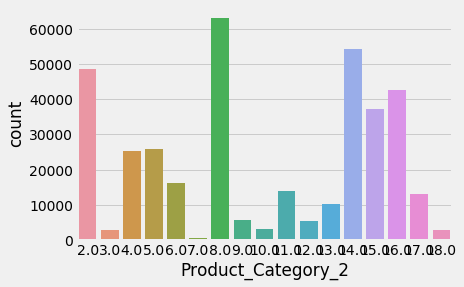

In [24]:
sns.countplot(data.Product_Category_2)

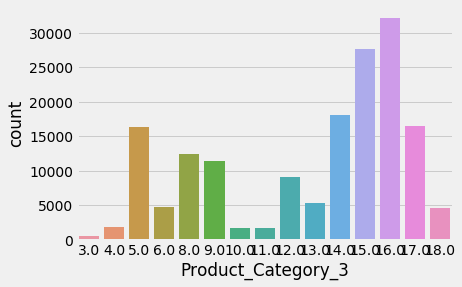

In [25]:
sns.countplot(data.Product_Category_3)

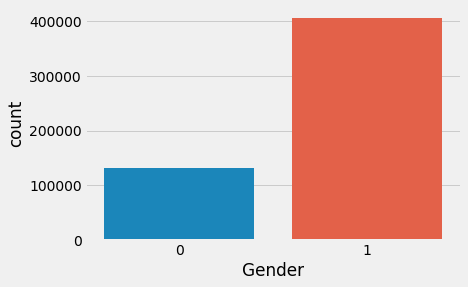

In [26]:
sns.countplot(data.Gender)

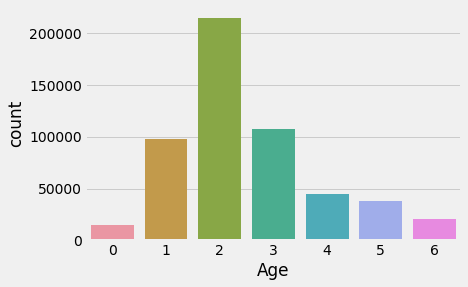

In [27]:
sns.countplot(data.Age)

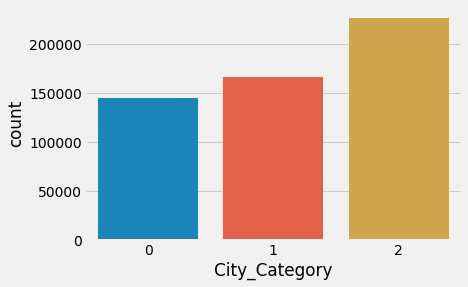

In [28]:
sns.countplot(data.City_Category)

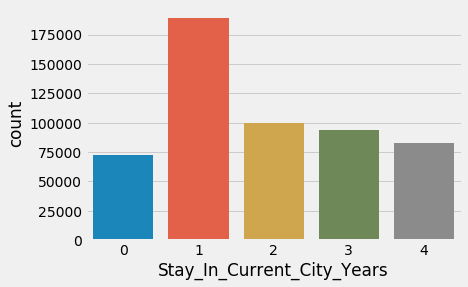

In [29]:
sns.countplot(data.Stay_In_Current_City_Years)

Purchase                      1.000000
Gender                        0.060086
Occupation                    0.021104
City_Category                 0.010854
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_ID                   -0.079774
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 

Purchase                      1.000000
Gender                        0.060086
Occupation                    0.021104
City_Category                 0.010854
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_ID                   -0.079774
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64
Index(['Purchase', 'Gender', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_3',
       'Product_ID'

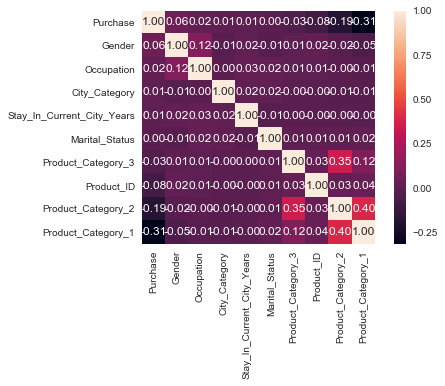

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64


In [30]:
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, "Purchase").index
print(columns)



#Looking for missing values and make them == to mean
data['Product_Category_3']= \
data['Product_Category_3'].fillna(round(data['Product_Category_3'].mean(),0)).astype('float')
data.Product_Category_3.value_counts().sort_index()
print(data['Product_Category_3'])
#################################################
#################################################
#################################################
data['Product_Category_2']= \
data['Product_Category_2'].fillna(round(data['Product_Category_2'].mean(),0)).astype('float')
data.Product_Category_3.value_counts().sort_index()
print(data['Product_Category_2'])
#################################################
#################################################
#################################################
# Lets start correlation analisis
# First how all fitches are correlated with Purchase 
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()
# Image ---> correlation matrix ==> you can see that Product_Category_1,2,3 have the best coreliation 
# It mens that I should predict purchase by these Product_Category_1,2,3 and try to predict Product_Category_1,2,3 from another features 
print(data.isnull().sum()/data.shape[0]*100)

In [31]:

#Stay_In_Current_City_Years to binary
le = LabelEncoder()
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])
print(data)

        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4           7              2   
8       1000004       97242       1   4           7              2   
9       1000005      274942       1   2          20              0   
10      1000005      251242       1   2          20              0   
11      1000005       14542       1   2          20              0   
12      1000005       31342       1   2          20              0   
13      1000005     

[537577 rows x 16 columns]


In [32]:

target = 'Purchase'
# function for training/trying diferent model
def modelfit(alg, dtrain, dtest, predictors, target):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])

    cv_score = cross_validate(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['fit_time']))
    
    #Print model report:
    print("Model Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    y_pred = alg.predict(dtest[predictors])
    y_true = np.array(dtest[target])
    print(accuracy_score(y_true, np.round(y_pred).astype(int)))
    
train_df, test_df, Y_train, Y_test =  train_test_split (data, data[target], test_size = 0.20, random_state=42)

Model Report
RMSE : 4704
CV Score : Mean - 0.8001 | Std - 0.009442 | Min - 0.7865 | Max - 0.8189
0.00017671788384984562


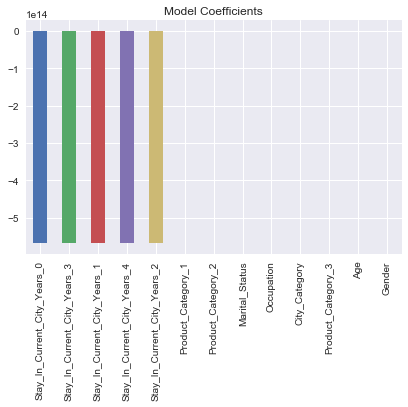

In [33]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
#print(type(train_df.columns.drop(['Purchase','Product_ID','User_ID'])))
#print(train_df.columns.drop(['Purchase','Product_ID','User_ID']))
modelfit(LR, train_df, test_df, predictors, target)
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [34]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05,normalize=True)
modelfit(model, train_df, test_df, predictors, target)

Model Report
RMSE : 4704
CV Score : Mean - 0.7249 | Std - 0.01017 | Min - 0.7111 | Max - 0.7474
8.370847129729529e-05


In [35]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(model1, train_df, test_df, predictors, target)

Model Report
RMSE : 2919
CV Score : Mean - 1.236 | Std - 0.007438 | Min - 1.219 | Max - 1.249
0.00013951411882882547


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
model = linear_model.Lasso(alpha=0.1)
modelfit(model, train_df, test_df, predictors, target)

Model Report
RMSE : 4704
CV Score : Mean - 1.032 | Std - 0.05546 | Min - 0.9445 | Max - 1.145
0.00016741694259459058


In [37]:
#model = GradientBoostingRegressor(random_state=21)
#modelfit(model, train_df, test_df, predictors, target)

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(model1,k_features=13,forward=True,floating=False,verbose=2,scoring='neg_mean_squared_error',cv=5)
sfs1 = sfs1.fit(train_df[predictors], train_df[target])
print(list(sfs1.k_feature_idx_))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.8s finished

[2019-01-12 13:06:25] Features: 1/13 -- score: -9231841.133525874[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   10.0s finished

[2019-01-12 13:06:35] Features: 2/13 -- score: -9041075.582395446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   16.7s finished

[2019-01-12 13:06:52] Features: 3/13 -- score: -8722974.18452429[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s finished

[2019-01-12 13:44:48] Features: 13/13 -- score: -8729036.692151139

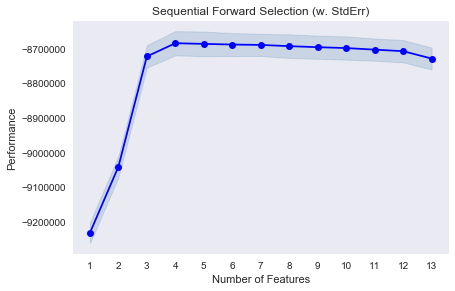

In [39]:
#print(sfs1.subsets_)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
# Leats try feature selection. Is our prediction from correlation analysis is true?

In [40]:
print(sfs1.subsets_[4]['feature_names'])
#our prediction is true so we can try model(DecisionTreeRegressor) with the best RMSE(Model Report) on new feature

('City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3')


In [41]:
model1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(model1, train_df, test_df, pd.core.indexes.base.Index(sfs1.subsets_[4]['feature_names']), target)

Model Report
RMSE : 2942
CV Score : Mean - 0.6213 | Std - 0.06552 | Min - 0.5752 | Max - 0.8611
0.00010231035380780535


In [42]:
#So we get the best model and parametrs for it. Our model is DecisionTreeRegressor. The features are 'City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'
#In these model we make regresion in next we will 
#